In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [72]:
# paso1: cargue la imagen y conviértala en una imagen en escala de grises
image = cv2.imread("variossellos2.png")
#image=cv2.resize(image,(1000,900))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [73]:
# paso2: use el operador Sobel para calcular el gradiente en las direcciones x e y, y luego reste el gradiente en la dirección y en la dirección x. A través de esta resta, dejamos un área de imagen con un gradiente horizontal alto y un gradiente vertical bajo.
gradX = cv2.Sobel(gray, cv2.CV_32F, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(gray, cv2.CV_32F, dx=0, dy=1, ksize=-1)

In [74]:
# subtract the y-gradient from the x-gradient
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)

-1

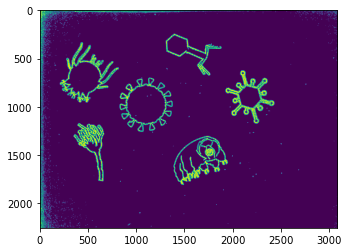

In [75]:
# show image
#cv2.imshow("first", gradient)
cv2.imwrite("Primera.jpg", gradient)
plt.imshow(gradient)
cv2.waitKey()

In [76]:
# paso3: elimine el ruido en la imagen. Primero use un filtro de paso bajo para suavizar la imagen (núcleo de 9 x 9), lo que ayudará a suavizar el ruido de alta frecuencia en la imagen.
# El objetivo del filtro de paso bajo es reducir la tasa de cambio de la imagen. Por ejemplo, reemplace cada píxel con el valor promedio de los píxeles alrededor del píxel. Esto puede suavizar y reemplazar aquellas áreas donde la intensidad cambia significativamente.
# Luego, binarice la imagen borrosa. Cualquier píxel en la imagen de degradado no mayor de 90 se establece en 0 (negro). De lo contrario, el píxel se establece en 255 (blanco).
# blur and threshold the image
blurred = cv2.blur(gradient, (9, 9))
_, thresh = cv2.threshold(blurred, 90, 255, cv2.THRESH_BINARY)

-1

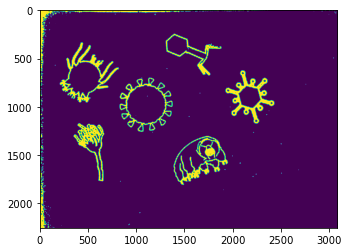

In [77]:
# SHOW IMAGE
#cv2.imshow("thresh", thresh)
plt.imshow(thresh)
cv2.waitKey()

In [78]:
# paso4: En la imagen de arriba, vemos que hay muchas vacantes negras en el área del cuerpo de la abeja. Necesitamos llenar estas vacantes con blanco para que sea más fácil para el siguiente programa identificar el área del insecto.
# Esto requiere algunas operaciones morfológicas.
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 25))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

-1

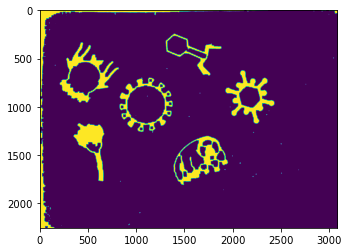

In [79]:
# show image
#cv2.imshow("closed1", closed)
plt.imshow(closed)
cv2.waitKey()

In [80]:
# paso5: De la imagen de arriba, descubrimos que todavía hay algunas pequeñas manchas blancas en la imagen, que interferirán con la detección de contornos de insectos en el futuro, y que deben eliminarse. Realizar corrosión morfológica y expansión 4 veces respectivamente.
# perform a series of erosions and dilations
closed = cv2.erode(closed, None, iterations=4)
closed = cv2.dilate(closed, None, iterations=4)

-1

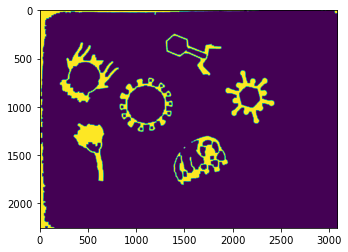

In [81]:
# show image
#cv2.imshow("closed2", closed)
cv2.imwrite("Segunda.jpg", closed)
plt.imshow(closed)
cv2.waitKey()

In [82]:
(cnts, x) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
c = sorted(cnts, key=cv2.contourArea, reverse=True)[0]

In [83]:
# compute the rotated bounding box of the largest contour
rect = cv2.minAreaRect(c)
box = np.int0(cv2.boxPoints(rect))

-1

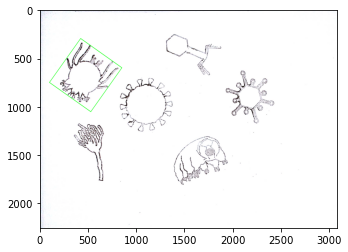

In [84]:
# draw a bounding box arounded the detected barcode and display the image
im = cv2.drawContours(image, [box], -1, (0, 255, 0), 3)
#cv2.imshow("Image", image)
plt.imshow(im)
cv2.imwrite("contoursImage2.jpg", image)
cv2.waitKey(0)

In [85]:
# step7: Recortar. En el cuadro se almacenan las coordenadas de los cuatro vértices del área rectangular verde. Recortaré la imagen del insecto como se muestra en el rectángulo rojo a continuación.
# Encuentra los valores máximos y mínimos de las coordenadas x e y de los cuatro vértices. La altura de la nueva imagen = maxY-minY, y el ancho = maxX-minX.
Xs = [i[0] for i in box]
Ys = [i[1] for i in box]
x1 = min(Xs)
x2 = max(Xs)
y1 = min(Ys)
y2 = max(Ys)
hight = y2 - y1
width = x2 - x1
cropImg = image[y1:y1+hight, x1:x1+width]

-1

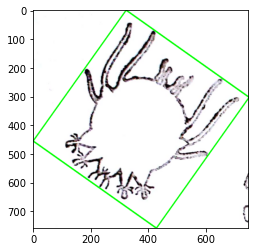

In [86]:
# show image
#cv2.imshow("cropImg", cropImg)
plt.imshow(cropImg)
cv2.imwrite("bee.jpg", cropImg)
cv2.waitKey()

In [87]:
dimensiones =(closed.shape[0], closed.shape[1])
array=np.zeros(dimensiones)
array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

True

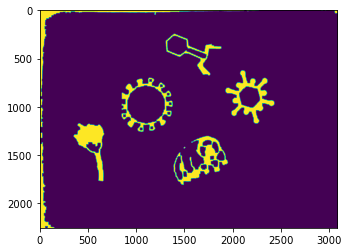

In [88]:
for i in range(closed.shape[1]):
    for j in range(closed.shape[0]):
        if (x1 < i < x2 and y1 < j < y2):
            array[j,i]=0
        else:
            array[j,i]=closed[j,i]
plt.imshow(array)
cv2.waitKey()
cv2.imwrite("Cuarta.jpg", array)

In [89]:
arr= np.uint8(array)

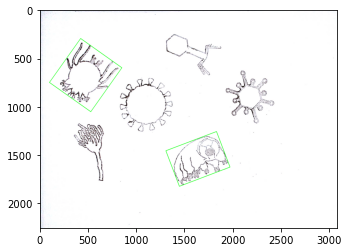

In [90]:
(cnts1, x1) = cv2.findContours(arr.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
c1 = sorted(cnts1, key=cv2.contourArea, reverse=True)[0]
rect1 = cv2.minAreaRect(c1)
box1 = np.int0(cv2.boxPoints(rect1))
im1=cv2.drawContours(image, [box1], -1, (0, 255, 0), 3)
#cv2.imshow("Image", image)
plt.imshow(image)
#cv2.imwrite("contoursImage2.jpg", image)
#cv2.waitKey(0)
Xs1 = [i[0] for i in box1]
Ys1 = [i[1] for i in box1]
x11 = min(Xs1)
x21 = max(Xs1)
y11 = min(Ys1)
y21 = max(Ys1)
hight1 = y21 - y11
width1 = x21 - x11
cropImg1 = image[y11:y11+hight1, x11:x11+width1]

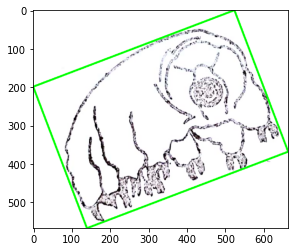

In [91]:
plt.imshow(cropImg1)

In [92]:
def recortar(imagen):
    (cntsf, xf) = cv2.findContours(imagen.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cf = sorted(cntsf, key=cv2.contourArea, reverse=True)[0]
    rectf = cv2.minAreaRect(cf)
    boxf = np.int0(cv2.boxPoints(rectf))
    cv2.drawContours(image, [boxf], -1, (0, 255, 0), 3)
    #cv2.imshow("Image", image)
    plt.imshow(image)
#cv2.imwrite("contoursImage2.jpg", image)
#cv2.waitKey(0)
    Xsf = [i[0] for i in box1]
    Ysf = [i[1] for i in box1]
    x1f = min(Xsf)
    x2f = max(Xsf)
    y1f = min(Ysf)
    y2f = max(Ysf)
    cropImgf = image[y1f:y2f, x1f:x2f]

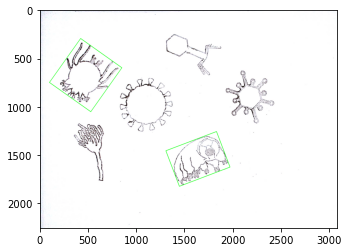

In [93]:
recortar(closed)